# Qiskit Certification Prep - Module 1.2 - Apply Quantum Operations
## Tensor Products and Multi-Qubit Systems

### Section 0: Tensor Products

Tensor products are used to describe multi-qubit systems. For example:

- $|0\rangle \otimes |0\rangle = |00\rangle$
- $|0\rangle \otimes |1\rangle = |01\rangle$
- $|+\rangle \otimes |+\rangle = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$
- $|+\rangle \otimes |-\rangle = \frac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)$

In [1]:
from qiskit.quantum_info import Statevector

# Tensor product of |0> and |0>
print("Tensor |0⟩ ⊗ |0⟩ =", Statevector.from_label('00'))

# Tensor |+> ⊗ |+>
plus_plus = Statevector([0.5, 0.5, 0.5, 0.5])
print("|+⟩ ⊗ |+⟩ =", plus_plus)


Tensor |0⟩ ⊗ |0⟩ = Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
|+⟩ ⊗ |+⟩ = Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


**What You Need to Know for the Exam:**  
- ✅ Multi-qubit states are tensor products of single-qubit states  
- ✅ Gates on multiple qubits can be tensor products of single-qubit gates (e.g., \( $I \otimes X$ \))  
- ✅ Tensor product order matters: \( $|0\rangle \otimes |1\rangle \ne |1\rangle \otimes |0\rangle$ \)  
- ✅ You should understand how these operations affect statevectors and circuits

## Section 1 – Gate Tensor Products

Gate operations on multi-qubit systems can be expressed as tensor products of single-qubit gates. For example, applying the Pauli-X gate to the *second* qubit in a three-qubit system corresponds to:

$$I \otimes X \otimes I$$

This operation will flip the middle qubit state of any three-qubit vector.

Initial state: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


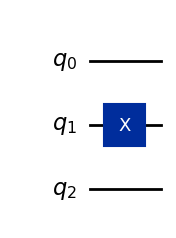

After I⊗X⊗I on |010> → Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Probabilities: {np.str_('000'): np.float64(1.0)}


In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator

# Initial state |010>
state = Statevector.from_label('010')
print('Initial state:', state)

# Build gate: X on qubit 1 (middle qubit)
qc = QuantumCircuit(3)
qc.x(1)
display(qc.draw('mpl'))

# Evolve the state
new_state = state.evolve(qc.to_instruction())
print('After I⊗X⊗I on |010> →', new_state)
print('Probabilities:', new_state.probabilities_dict())

## Section 2: Measuring Quantum Circuits in Classical Registers

Map qubits to classical bits using `measure()`, or use `measure_all()` for convenience.

### Measurement Methods in Qiskit

Here are **five different ways** to measure qubits into classical bits:
1. **Single qubit → single classical bit**
   ```python
   qc.measure(0, 0)
   ```
2. **Multiple qubits → multiple classical bits**
   ```python
   qc.measure([0,1,2], [0,1,2])
   ```
3. **Measure all qubits**
   ```python
   qc.measure_all()
   ```
4. **Separate measure calls**
   ```python
   qc.measure(0, 0)
   qc.measure(1, 1)
   ```
5. **Measure a subset of qubits**
   ```python
   qc.measure([0,2], [0,1])
   ```

### Computing Measurement Probabilities (Basics)

In Qiskit, a final `measure` reads qubits in the **computational (Z) basis** $\{|0\rangle, |1\rangle\}$.  
For a single-qubit state $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$ with $|\alpha|^2+|\beta|^2=1$:
- $\Pr(0)=|\alpha|^2$,  
- $\Pr(1)=|\beta|^2$.

**Rotations and amplitudes.** Many circuits prepare $|\psi\rangle$ via rotations. For example,
- $R_y(\theta)|0\rangle=\cos(\tfrac{\theta}{2})|0\rangle+\sin(\tfrac{\theta}{2})|1\rangle$, so  
  $\Pr(1)=\sin^2(\tfrac{\theta}{2})$, $\Pr(0)=\cos^2(\tfrac{\theta}{2})$.
- $H|0\rangle=\tfrac{|0\rangle+|1\rangle}{\sqrt{2}}$ gives $\Pr(0)=\Pr(1)=\tfrac{1}{2}$.

**Qiskit example.**
```python
qc.reset(0)          # prepares |0>
qc.ry(np.pi/2, 0)    # θ = π/2
qc.measure_all()
```
After $R_y(\pi/2)$:
$|\psi\rangle=\cos(\pi/4)|0\rangle+\sin(\pi/4)|1\rangle=\tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$.
Thus $\Pr(1)=\sin^2(\pi/4)=\tfrac{1}{2}=0.5$.

Takeaways.

1. Express the post-gate state in the form $\alpha|0\rangle+\beta|1\rangle$.

2.  Square magnitudes of amplitudes to get measurement probabilities.

3.  Global phases do not affect probabilities; only amplitudes’ magnitudes do.

### Practice Examples: Gate Tensor Products

Below are several gate tensor product operations. Predict the output state and then verify using Qiskit.

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Example 1: I⊗I⊗X on |000> → flips last qubit to |001>
state1 = Statevector.from_label('000')
qc1 = QuantumCircuit(3)
qc1.x(2)
print('Example 1 result:', state1.evolve(qc1.to_instruction()))

# Example 2: X⊗X on |00> → flips both qubits to |11>
state2 = Statevector.from_label('00')
qc2 = QuantumCircuit(2)
qc2.x(0); qc2.x(1)
print('Example 2 result:', state2.evolve(qc2.to_instruction()))

# Example 3: H⊗I on |10> → superposition on first qubit
state3 = Statevector.from_label('10')
qc3 = QuantumCircuit(2)
qc3.h(0)
print('Example 3 result:', state3.evolve(qc3.to_instruction()))

# Example 4: I⊗H⊗Z on |011> → H on second, Z on third
state4 = Statevector.from_label('011')
qc4 = QuantumCircuit(3)
qc4.h(1); qc4.z(2)
print('Example 4 result:', state4.evolve(qc4.to_instruction()))

# Example 5: RZ(pi/2)⊗RX(pi) on |-->
import numpy as np
minus_minus = Statevector([1/2**0.5, -1/2**0.5]).tensor(Statevector([1/2**0.5, -1/2**0.5]))
qc5 = QuantumCircuit(2)
qc5.rz(np.pi/2, 0); qc5.rx(np.pi, 1)
print('Example 5 result:', minus_minus.evolve(qc5.to_instruction()))

Example 1 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))
Example 2 result: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Example 3 result: Statevector([0.        +0.j, 0.        +0.j, 0.70710678+0.j,
             0.70710678+0.j],
            dims=(2, 2))
Example 4 result: Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))
Example 5 result: Statevector([ 0.35355339+0.35355339j,  0.35355339-0.35355339j,
             -0.35355339-0.35355339j, -0.35355339+0.35355339j],
            dims=(2, 2))


In [1]:
from qiskit import QuantumCircuit

# 1. Single qubit → single classical bit
qc1 = QuantumCircuit(1,1)
qc1.h(0)
qc1.measure(0, 0)
print(qc1.draw('mpl'))

# 2. Multiple qubits → multiple classical bits
qc2 = QuantumCircuit(3,3)
qc2.h([0,1,2])
qc2.measure([0,1,2], [0,1,2])
print(qc2.draw('mpl'))

# 3. Measure all qubits
qc3 = QuantumCircuit(4,4)
qc3.h(range(4))
qc3.measure_all()
print(qc3.draw('mpl'))

# 4. Separate measure calls
qc4 = QuantumCircuit(2,2)
qc4.x(0)
qc4.measure(0, 0)
qc4.measure(1, 1)
print(qc4.draw('mpl'))

# 5. Measure a subset of qubits
qc5 = QuantumCircuit(3,2)
qc5.h([0,2])
qc5.measure([0,2], [0,1])
print(qc5.draw('mpl'))

Figure(269.064x200.667)
Figure(454.719x367.889)
Figure(663.998x535.111)
Figure(287.294x284.278)
Figure(371.107x367.889)


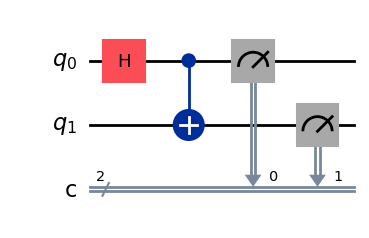

In [2]:
from qiskit import QuantumCircuit

# 2-qubit circuit with 2 classical bits
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
# Measure qubits into classical bits
qc.measure([0, 1], [0, 1])

qc.draw('mpl')

## Practice Questions: Measurement Probabilities — Multiple-Choice (Qiskit)

All practice questions are consolidated here. Answers are under collapsible toggles.

**Q1.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.ry(np.pi/3, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.25  
B. 0.75  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**A.** Using $R_y(\theta)\lvert0\rangle=\cos\!\big(\tfrac{\theta}{2}\big)\lvert0\rangle+\sin\!\big(\tfrac{\theta}{2}\big)\lvert1\rangle$, with $\theta=\pi/3$: $P(1)=\sin^2(\pi/6)=0.25$.

- **B (0.75):** Would require $\sin^2(\theta/2)=0.75$ (e.g., $\theta\approx 2\pi/3$), not $\pi/3$.  
- **C (0.5):** Occurs at $\theta=\pi/2$, not $\pi/3$.  
- **D (1.0):** Occurs at $\theta=\pi$, not $\pi/3$.
</details>

---

**Q2.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.rx(np.pi, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.0  
B. 0.5  
C. 1.0  
D. 0.25  
<details><summary>Answer</summary>
**C.** $R_x(\pi)\lvert0\rangle=-i\lvert1\rangle$; global phase is irrelevant, so $P(1)=1$.

- **A (0.0):** Would mean the state stayed at $\lvert0\rangle$, but $R_x(\pi)$ flips it.  
- **B (0.5):** Would occur at $\theta=\pi/2$ (equal superposition), not $\pi$.  
- **D (0.25):** No standard single-axis $\pi$ rotation produces this on $\lvert0\rangle$.
</details>

---

**Q3.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.x(0)
qc.rz(np.pi/7, 0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 1.0  
B. 0.0  
C. 0.5  
D. 0.1464  
<details><summary>Answer</summary>
**A.** After $X$, the state is $\lvert1\rangle$. $R_z$ adds only a phase, leaving Z-basis probabilities unchanged.

- **B (0.0):** Would require the state $\lvert0\rangle$, but we flipped to $\lvert1\rangle$.  
- **C (0.5):** Would require a superposition (e.g., $H\lvert0\rangle$), not a pure basis state.  
- **D (0.1464):** No—$R_z$ does not change measurement probabilities in the computational basis.
</details>

---

**Q4.** Given:
```python
from qiskit import QuantumCircuit
import numpy as np
qc = QuantumCircuit(1)
qc.reset(0)
qc.h(0)
qc.rz(np.pi/3, 0)
qc.h(0)
qc.measure_all()
```
What is the probability of measuring `1`?  
A. 0.75  
B. 0.25  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**B.** $H R_z(\phi) H = R_x(\phi)$. Thus the circuit equals $R_x(\pi/3)\lvert0\rangle$, giving $P(1)=\sin^2(\pi/6)=0.25$.

- **A (0.75):** Would be $\sin^2(\pi/3)$, i.e., $R_x(2\pi/3)$, not $\pi/3$.  
- **C (0.5):** Would require $\phi=\pi/2$, not $\pi/3$.  
- **D (1.0):** Would require a full flip ($\phi=\pi$).
</details>

---

**Q5.** Given:
```python
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.reset(range(2))
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
```
What is the probability that **qubit 1** is measured as `1`?  
A. 0.0  
B. 0.25  
C. 0.5  
D. 1.0  
<details><summary>Answer</summary>
**C.** State is $(\lvert00\rangle+\lvert11\rangle)/\sqrt{2}$. Each qubit marginally has $P(0)=P(1)=\tfrac{1}{2}$.

- **A (0.0):** Qubit 1 is not fixed; it’s correlated but marginal is uniform.  
- **B (0.25):** No—Bell state marginals are not biased.  
- **D (1.0):** Would require qubit 1 deterministically $\lvert1\rangle$, which it isn’t.
</details>


### Practice Questions

(all Answers are at the end).

**Q1.** Starting from $|10\rangle$, apply $(H \otimes I)$. What is the resulting state?
- A. $(|00\rangle - |10\rangle)/\sqrt{2}$
- B. $(|10\rangle + |11\rangle)/\sqrt{2}$
- C. $(|00\rangle + |10\rangle)/\sqrt{2}$
- D. $(|01\rangle + |11\rangle)/\sqrt{2}$

**Q2.** Starting from $|01\rangle$, apply $(I \otimes H)$. What state do you obtain?
- A. $(|00\rangle - |01\rangle)/\sqrt{2}$
- B. $(|01\rangle + |11\rangle)/\sqrt{2}$
- C. $(|00\rangle + |01\rangle)/\sqrt{2}$
- D. $(|10\rangle + |11\rangle)/\sqrt{2}$

**Q3.** On $|00\rangle$, applying $(H \otimes X)$ yields:
- A. $(|01\rangle + |11\rangle)/\sqrt{2}$
- B. $(|00\rangle + |10\rangle)/\sqrt{2}$
- C. $(|01\rangle + |10\rangle)/\sqrt{2}$
- D. $(|11\rangle)/\sqrt{2}$

**Q4.** Which tensor product applies a Pauli-X to every qubit in a three-qubit system?
- A. $X \otimes X \otimes X$
- B. $RX(\pi) \otimes RX(\pi) \otimes RX(\pi)$
- C. $H \otimes H \otimes H$
- D. $I \otimes I \otimes I$

**Q5.** Starting from $|00\rangle$, apply $(RY(\pi/2) \otimes I)$. Which state is obtained?
- A. $(|00\rangle + |10\rangle)/\sqrt{2}$
- B. $(|00\rangle + |01\rangle)/\sqrt{2}$
- C. $(|10\rangle + |11\rangle)/\sqrt{2}$
- D. $(|01\rangle + |11\rangle)/\sqrt{2}$

### Answer Key
- Q1: A
- Q2: A
- Q3: A
- Q4: A
- Q5: A